# 1000 чертей

In [37]:
from scipy.interpolate import splrep, splev
import statsmodels
import pc
import statsmodels.api as sm
import statsmodels.stats.api as ssa
import scipy
import numpy as np
import random
import sklearn
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
from scipy.stats import bws_test
from sklearn import linear_model 
import csv
from sklearn.linear_model import LinearRegression, HuberRegressor, RANSACRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.regression.quantile_regression import QuantReg
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, OPTICS, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage




# 1. В файле Aggregation.txt содержится набор точек (вас интересуют только первые два столбца). Кластеризуйте его на а) 3 б) 7 в) 9 кластеров с помощью а) k-means б) DBScan в) OPTICS г) Spectral Clustering. Какой из алгоритмов дал лучший результат? Сверьте результат с третьим столбцом.

788


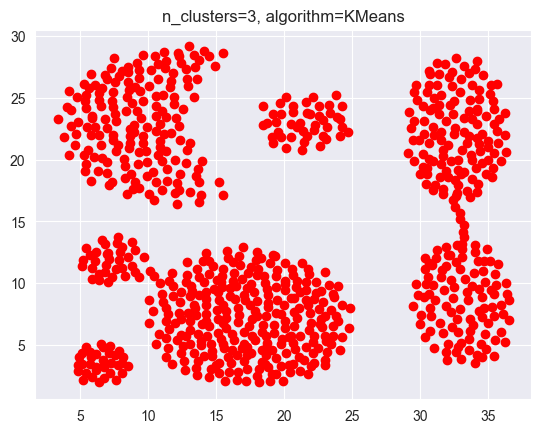

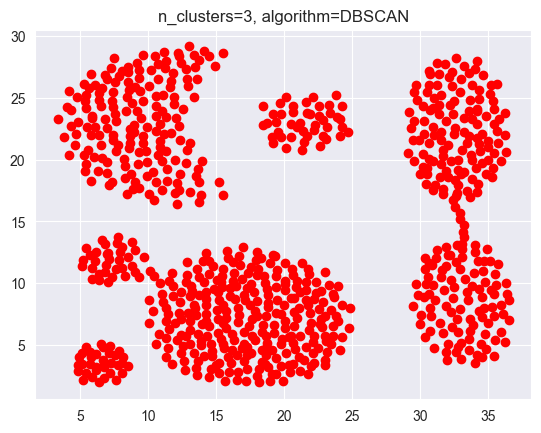

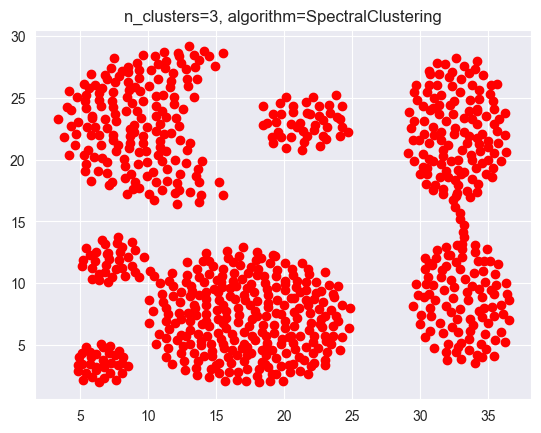

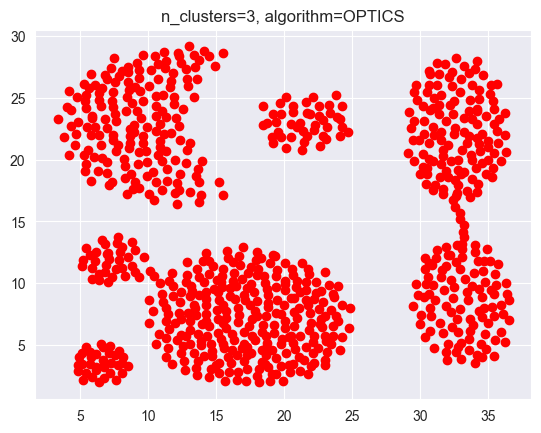

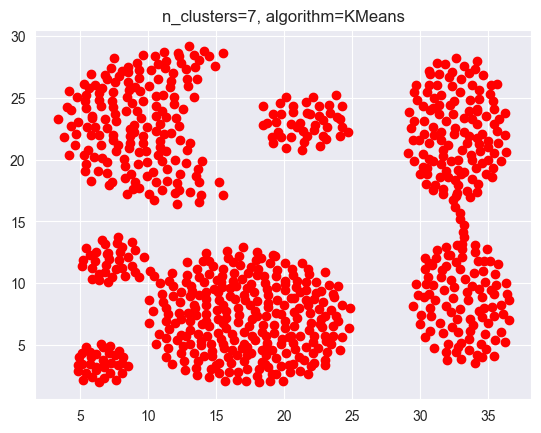

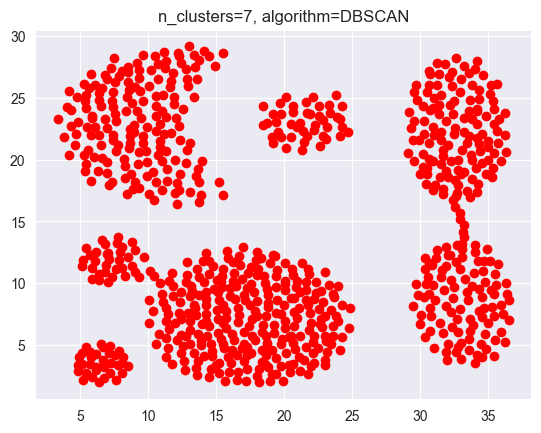

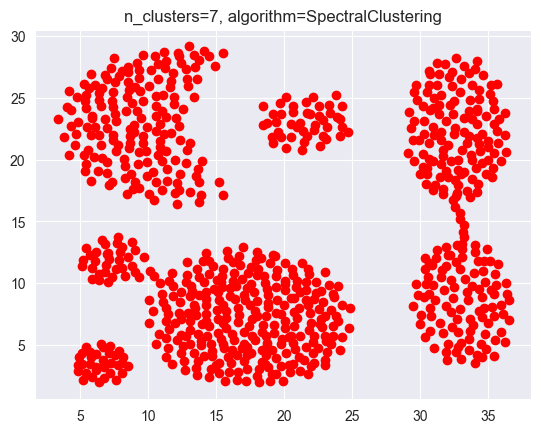

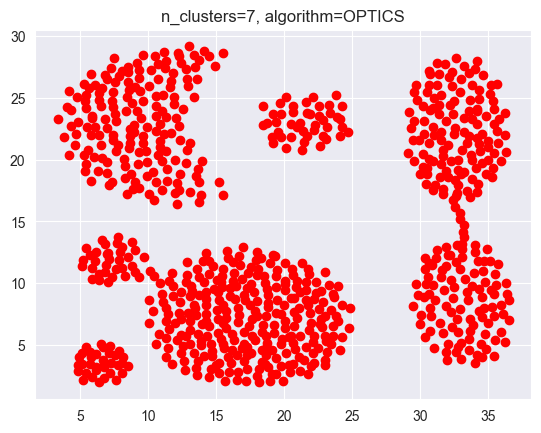

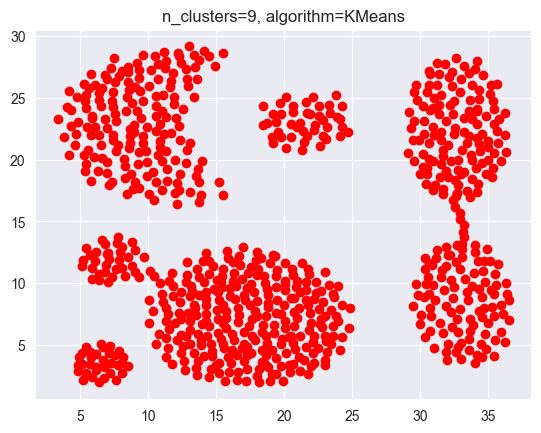

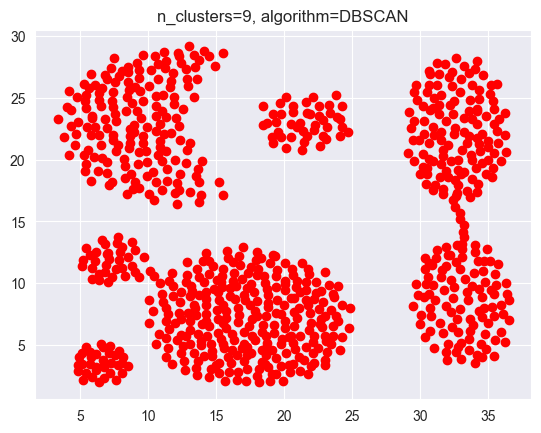

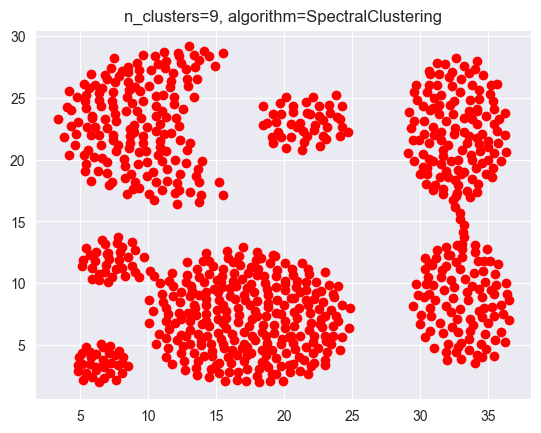

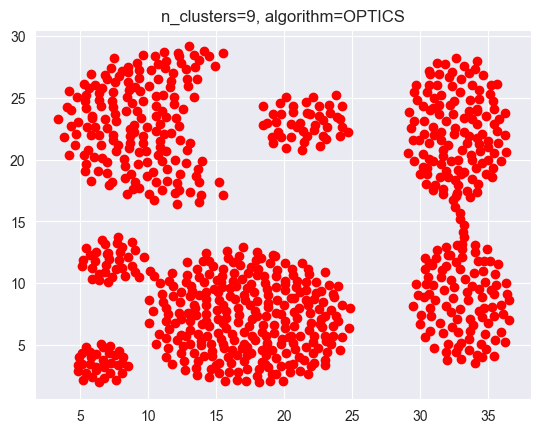

Лучший результат достигнут с использованием алгоритма KMeans и 3 кластеров.


In [35]:

import pandas as pd
# Загрузка данных из файла Aggregation.txt
data = pd.read_csv('Aggregation.txt', delimiter='\t', header=None, usecols=[0, 1, 2])

# Выбираем только первые два столбца данных
X = data.iloc[:, [0, 1]]
print(len(X))
# Задаем количество кластеров для каждого алгоритма
num_clusters = [3, 7, 9]
# print(X[0])
# Пустой словарь для хранения результатов кластеризации
cluster_results = {}

# Проходим по каждому числу кластеров и каждому алгоритму
for n_clusters in num_clusters:
    for algorithm in ['KMeans', 'DBSCAN', 'SpectralClustering', 'OPTICS']:
        if algorithm == 'KMeans':
            model = KMeans(n_clusters=n_clusters, random_state=42)
        elif algorithm == 'DBSCAN':
            model = DBSCAN()
        elif algorithm == 'SpectralClustering':
            model = SpectralClustering(n_clusters=n_clusters, random_state=42)
        elif algorithm == 'OPTICS':
            model = OPTICS()
        
        # Обучение модели и предсказание кластеров
        
        cluster_labels = model.fit_predict(X)
        model.fit(X)
        plt.scatter(X[0], X[1], color="r", )
        # plt.scatter(model.cluster_centers_[1], 
        #     model.cluster_centers_[3], 
        #     color="k", marker="*") 
        # plt.scatter(model.cluster_centers_[2], 
        #     model.cluster_centers_[0], 
        #     color="k", marker="*") 
        plt.title(f"n_clusters={n_clusters}, algorithm={algorithm}")
        plt.show()
        # Сохранение результатов
        cluster_results[(algorithm, n_clusters)] = cluster_labels

# Сверка результатов с третьим столбцом данных
true_labels = data.iloc[:, 2]

# Оценка качества кластеризации на основе коэффициента силуэта
best_score = -1
best_algorithm = ''
best_num_clusters = -1


for key, labels in cluster_results.items():
    unique_labels = np.unique(labels)
    
    if len(unique_labels) < 2:
        continue  # Пропускаем этот результат кластеризации
        
    score = silhouette_score(X, labels)
    algorithm, n_clusters = key
    
    if score > best_score:
        best_score = score
        best_algorithm = algorithm
        best_num_clusters = n_clusters


print(f"Лучший результат достигнут с использованием алгоритма {best_algorithm} и {best_num_clusters} кластеров.")


# 2. В файле Clust.txt содержится набор точек (вас интересуют только первые два столбца). Класте- ризуйте его на а) 3 б) 6 в) 7 кластеров с помощью а) k-means б) DBScan в) OPTICS г) Spectral Clustering. Какой из алгоритмов дал лучший результат?

In [36]:

# Считываем данные из файла Clust.txt, оставляем только первые два столбца
data = pd.read_csv('Clust.txt', header=None,  delimiter=',')
data = data.iloc[:, [0, 1]]
print(len(data))
num_clusters = [3, 7, 9]
cluster_results = {}

for n_clusters in num_clusters:
    for algorithm in ['KMeans', 'DBSCAN', 'SpectralClustering', 'OPTICS']:
        if algorithm == 'KMeans':
            model = KMeans(n_clusters=n_clusters, random_state=42)
        elif algorithm == 'DBSCAN':
            model = DBSCAN()
        elif algorithm == 'SpectralClustering':
            model = SpectralClustering(n_clusters=n_clusters, random_state=42)
        elif algorithm == 'OPTICS':
            model = OPTICS()
        
        # Обучение модели и предсказание кластеров
        cluster_labels = model.fit_predict(X)
        # print(f" {algorithm} c n_clusters = {n_clusters} = ", cluster_labels)
        # Сохранение результатов
        cluster_results[(algorithm, n_clusters)] = cluster_labels


best_score = -1
best_algorithm = ''
best_num_clusters = -1


for key, labels in cluster_results.items():
    unique_labels = np.unique(labels)
    
    if len(unique_labels) < 2:
        continue  # Пропускаем этот результат кластеризации
        
    score = silhouette_score(X, labels)
    algorithm, n_clusters = key
    
    if score > best_score:
        best_score = score
        best_algorithm = algorithm
        best_num_clusters = n_clusters

# Оцените результаты каждого метода кластеризации
print(f"Лучший результат достигнут с использованием алгоритма {best_algorithm} и {best_num_clusters} кластеров.")



# Определите, какой алгоритм дал лучший результат


8000
Лучший результат достигнут с использованием алгоритма KMeans и 3 кластеров.


# 3. В файле ClustNorm содержится набор точек. Кластеризуйте его с помощью иерархической кластеризации. Постройте дендрограмму и выберите оптимальное число кластеров. Разделите данные на такое число кластеров методом k-средних и сравните с оригиналом из ClustNorm-label.


/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_2599/38385927.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('ClustNorm.txt', delimiter='    ')


4999


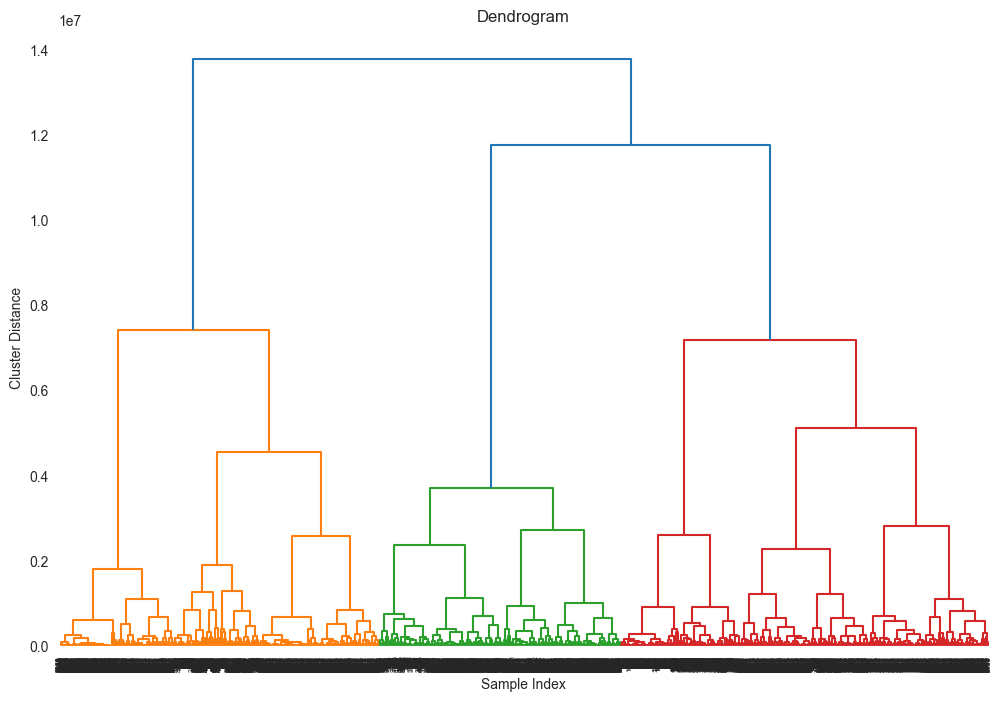

labels_original =        1
0      1
1      1
2      1
3      1
4      1
...   ..
4994  15
4995  15
4996  15
4997  15
4998  15

[4999 rows x 1 columns] labels_agg = [2 2 2 ... 2 0 2]


ValueError: labels_true must be 1D: shape is (4999, 1)

In [46]:
from sklearn.cluster import AgglomerativeClustering

# Считываем данные из файла ClustNorm
data = pd.read_csv('ClustNorm.txt', delimiter='    ')
print(len(data))
# Иерархическая кластеризация для выбора оптимального числа кластеров
Z = linkage(data, 'ward')
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()

# Выбираем оптимальное число кластеров на основе дендрограммы

# Кластеризация с использованием метода Agglomerative Clustering
num_clusters = 3  # Задаем оптимальное число кластеров
agg_cluster = AgglomerativeClustering(n_clusters=num_clusters)
labels_agg = agg_cluster.fit_predict(data)
labels_agg = np.array(labels_agg)
labels_original = np.array(labels_original)
# Сравнение с исходными метками из ClustNorm-label
labels_original = pd.read_csv('ClustNorm-label.txt', delimiter= " ")
print(f"labels_original = {labels_original}", f"labels_agg = {labels_agg}")
ari_score = adjusted_rand_score(labels_original, labels_agg)
print(f'Adjusted Rand Index score: {ari_score}')

# Кластеризация с использованием метода k-средних с оптимальным числом кластеров
kmeans = KMeans(n_clusters=num_clusters)
labels_kmeans = kmeans.fit_predict(data)

# Сравнение с исходными метками из ClustNorm-label
ari_score_kmeans = adjusted_rand_score(labels_original, labels_kmeans)
print(f'Adjusted Rand Index score for KMeans: {ari_score_kmeans}')

